<a href="https://colab.research.google.com/github/kuaniv/Course-Project-Shiny-Application-and-Reproducible-Pitch/blob/master/Sber_Corp_University_Uplift_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uplift Modeling** - Краткая теоретическая часть

## Теория

Задачей Uplift моделирования является оценка чистого эффекта от коммуникации, пытаясь выделить только тех клиентов, которые совершат целевое действие только при нашем взаимодействии. Модель оценивает разницу в поведении клиента при наличии воздействия и при его отсутствии.

Для оптимизации эффекта от воздействия хочется посчитать разницу реакций человека при наличии коммуникации и при ее отсутствии.

При этом главная проблема uplift моделирования заключается в том, что мы не можем одновременно совершить коммуникацию (например, послать смс) и не совершить коммуникацию (не послать смс).

Стоит отметить, что uplift моделирование применимо только при следующем предположении об условной независимости: разделение на целевую и контрольную группу происходит случайно, а не в зависимости от значения какого-то признака. Потенциальная реакция объекта — это только следствие характеристик этого объекта $X_i$ (например, установка приложения по аренде квартир зависит от возраста и города проживания), которое проявляется до того, как он попадет в какую-либо группу (целевую или контрольную).


## Подходы решения (металернеры)

 ### Терминология

 **Целевая переменная** - величина за которой ведется наблюдение в ходе экспериментов (например: просмотры, конверсия, ARPU, CLTV и т.д.).


**Целевая группа (ЦГ, treatment)** - группа, с которой проводилось взаимодействие.


**Контрольная группа (КГ, control)** - группа, с которой **НЕ** проводилось взаимодействие.


**Обучающая выборка** - выборка, на которой производится обучений модели.


**Тестовая выборка** - выборка, на которой производится оценка качетсва обученной модели.



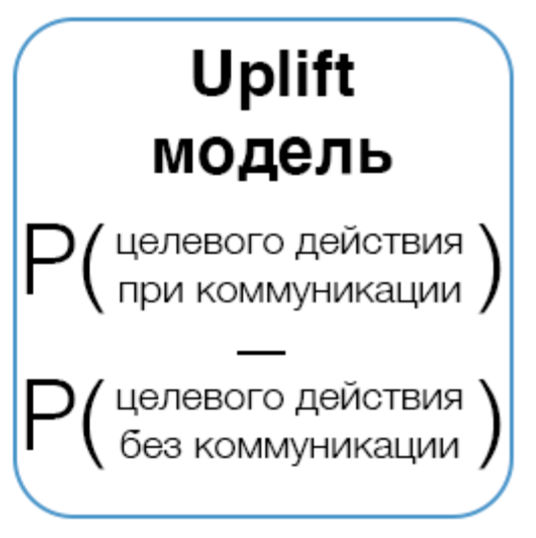

Далее будут перечислены основные алгоритмы (металернеры) с кратким описанием их обучения/применения, использующиеся для решения задач uplift моделирования.

###SLearner

Алгоритм обучения ```SLearner```:

1.   Значения флага ЦГ/КГ проставляем допольнительным признаком в обучающей выборке.
2.   Обучаем модель на выборке с дополнительным признаком.


Алгоритм предсказания ```SLearner```:

1.   Проставляем "1" в качестве значений флага группы, делаем предсказание моделью.
2.   Проставляем "0" в качестве значений флага группы, делаем предсказание моделью.
5.   Итоговое предсказание разница двух предсказаний ("ЦГ" - "КГ").

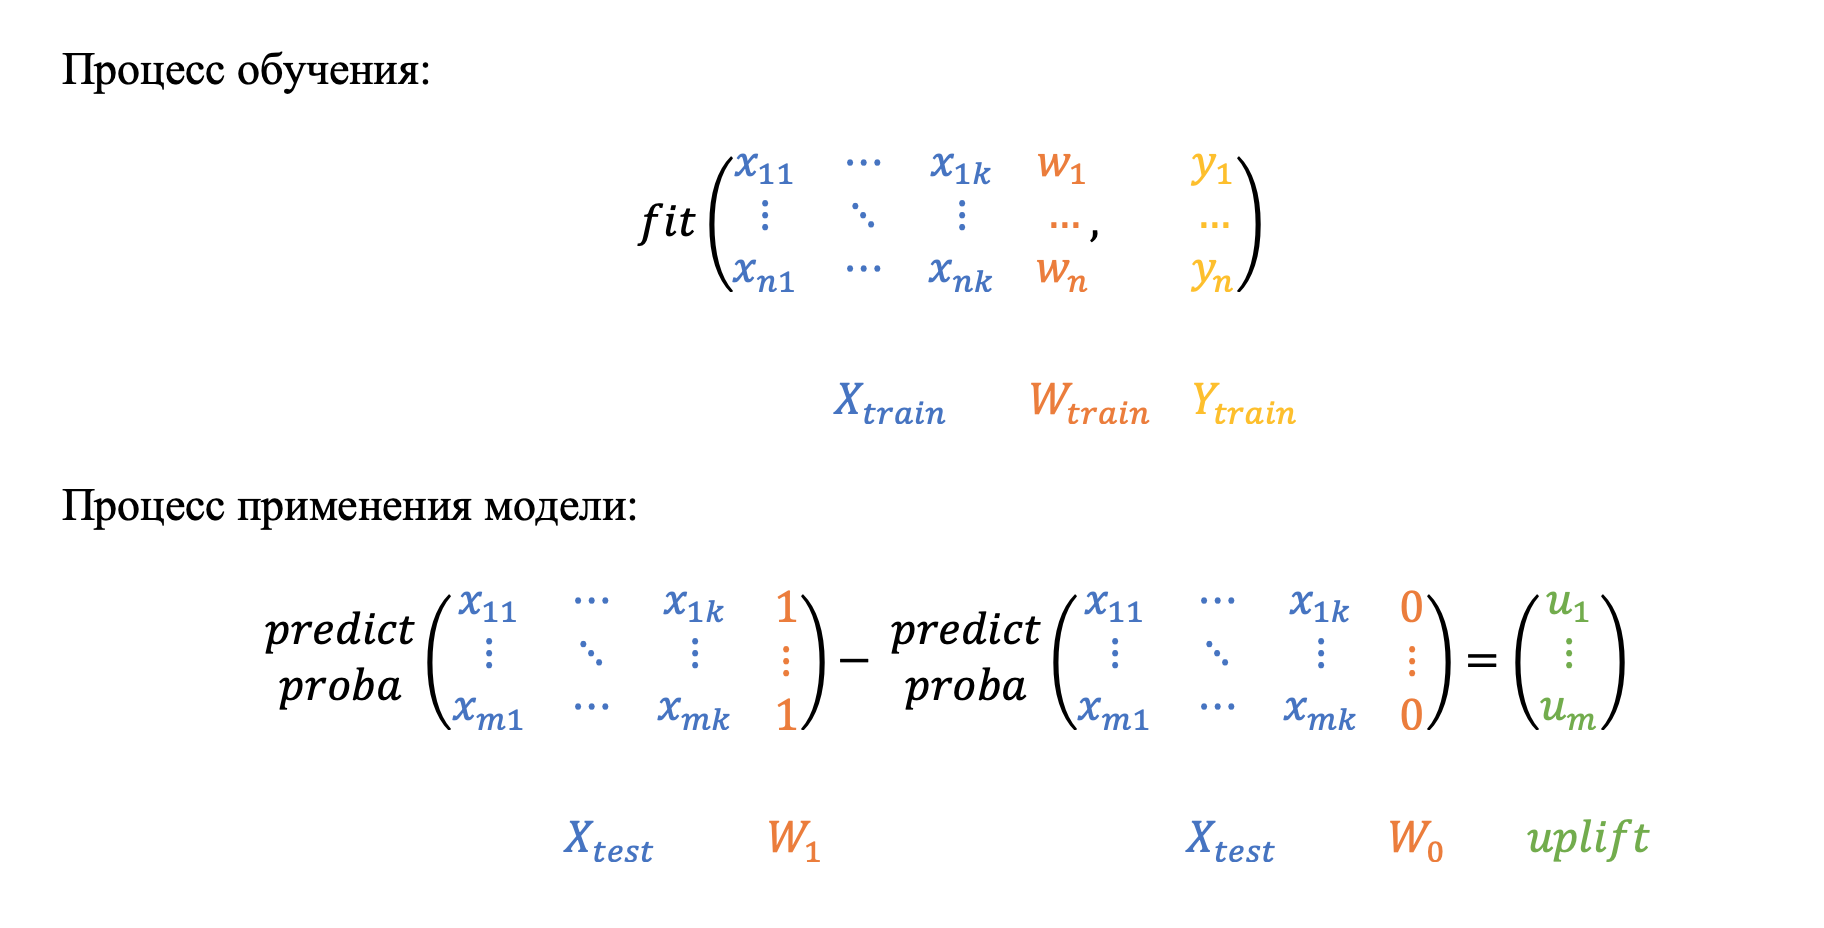

###TLearner

Алгоритм обучения ```TLearner```:

1.   Делим выборку на две части  по флагу ЦГ/КГ.
2.   Обучаем две модели на полученных выборках.


Алгоритм предсказания ```TLearner```:

1.   Делаем предсказание двумя моделями на тестовой выборке.
5.   Итоговое предсказание разница двух предсказаний ("ЦГ" - "КГ").

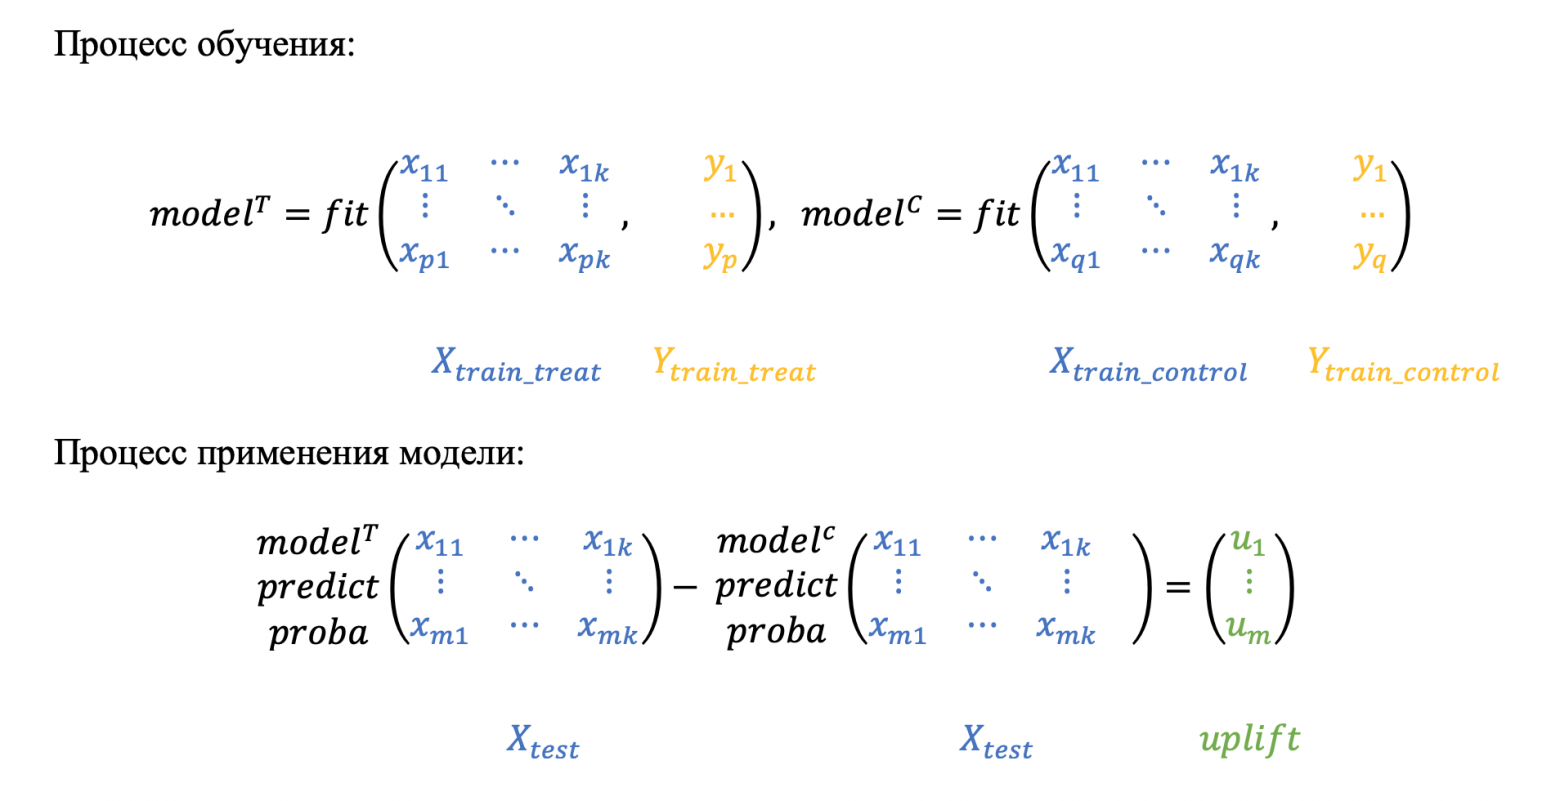

###TDLearner

Алгоритм обучения ```TDLearner```:

1.   Делим выборку на две части  по флагу ЦГ/КГ.
2.   Обучаем модель предсказывать событие в группе с меньшим числом элементов выборки.
3.   Моделью из п.2 совершаем предсказание на большую группу.
4.   Полученные значения предсказаний используем , как дополнительный признак для выборки большей группы.
5.   Обучаем вторую модель на выборке с доп признаком.


Алгоритм предсказания ```TDLearner```:

1.   Модель, полученной с меньшей выборки, проскориваем тестовую выборку .
2.   Полученные значения предсказаний используем , как дополнительный признак для предсказания модели , полученной. сбольшей выборки.
5.   Итоговое предсказание разница двух предсказаний.



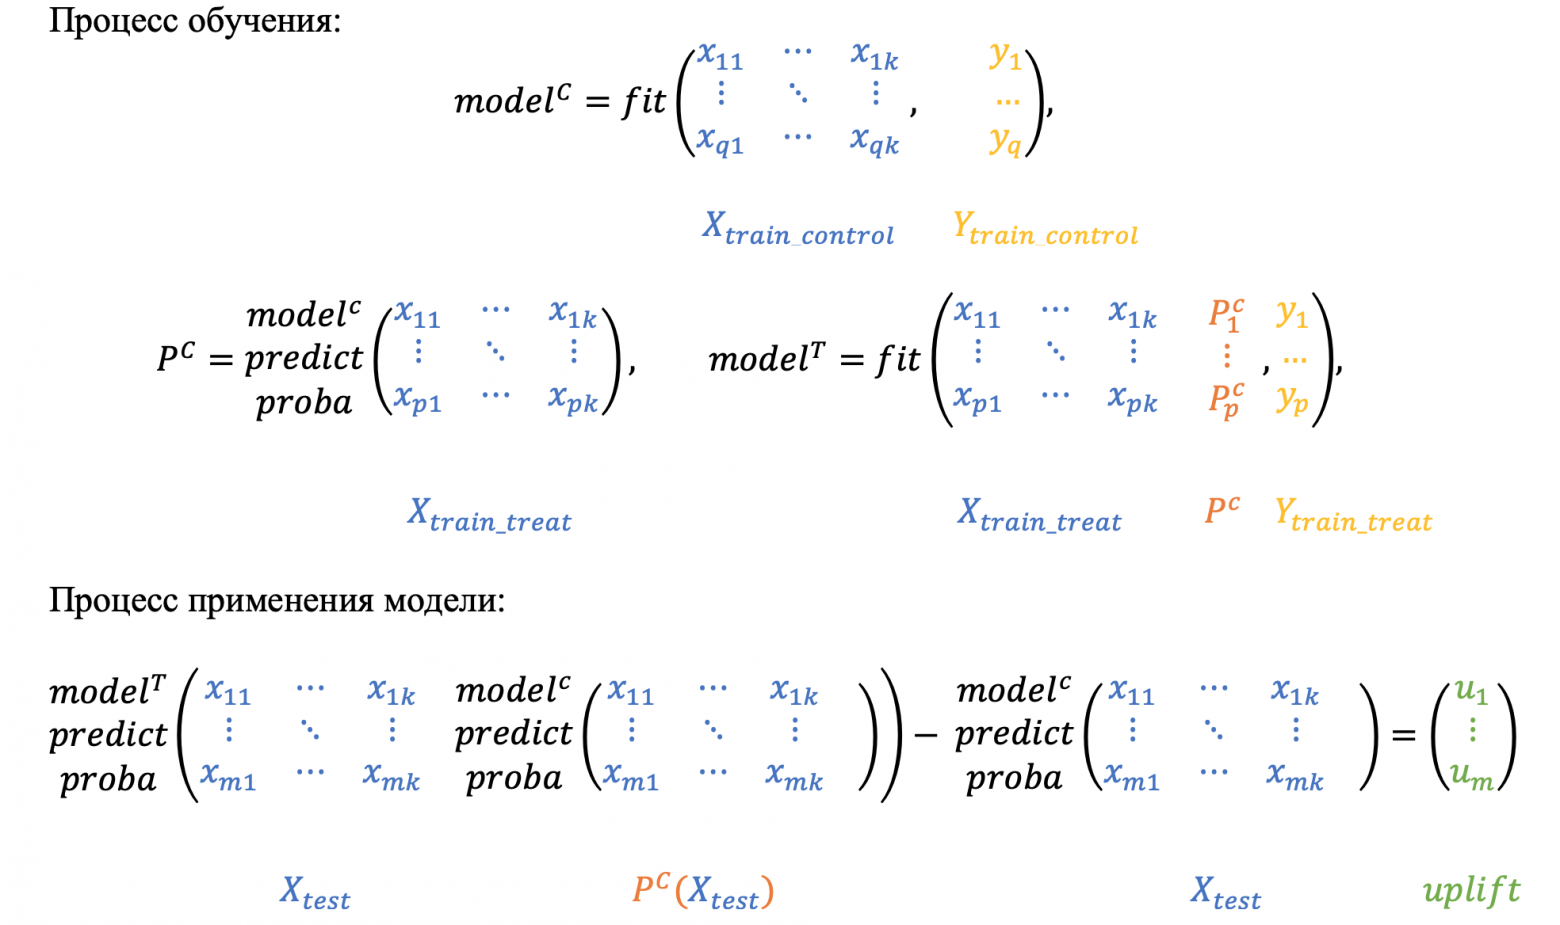

###XLearner

Алгоритм обучения ```XLearner```:

1.   Из обучающей выборки отбрасываем значения целевой переменой и обучаем модель предсказывать принадленость клиента группе ЦГ против КГ.
2.   Далее, повторяется процесс обучения ```TLearner``` - обучаем две модели , каждую на своей выборке.
3.   Моделями из п.2 совершаем предсказание на противоположные группы.
4.   Формируем из значений целевой переменной и значений предсказаний из п.3 новую целевую переменную для двух выборок.
5.   Обучаем еще две модели предсказывать "разности" с предыдущего шага.


Алгоритм предсказания ```XLearner```:

1.   Предсказвываем моделью принадлежности к группе "ЦГ" на тестовой выборке.
2.   Совершаем предсказния 2-мя мделями зи п.5.
5.   Итоговое предсказание является суммой двух величин:
    *   произведения предсказаний модели принадлежости "ЦГ" на предсказания "ЦГ"-модели.
    *   произведения предсказаний модели принадлежости "КГ" ( = 1 - "ЦГ") на предсказания "КГ"-модели.

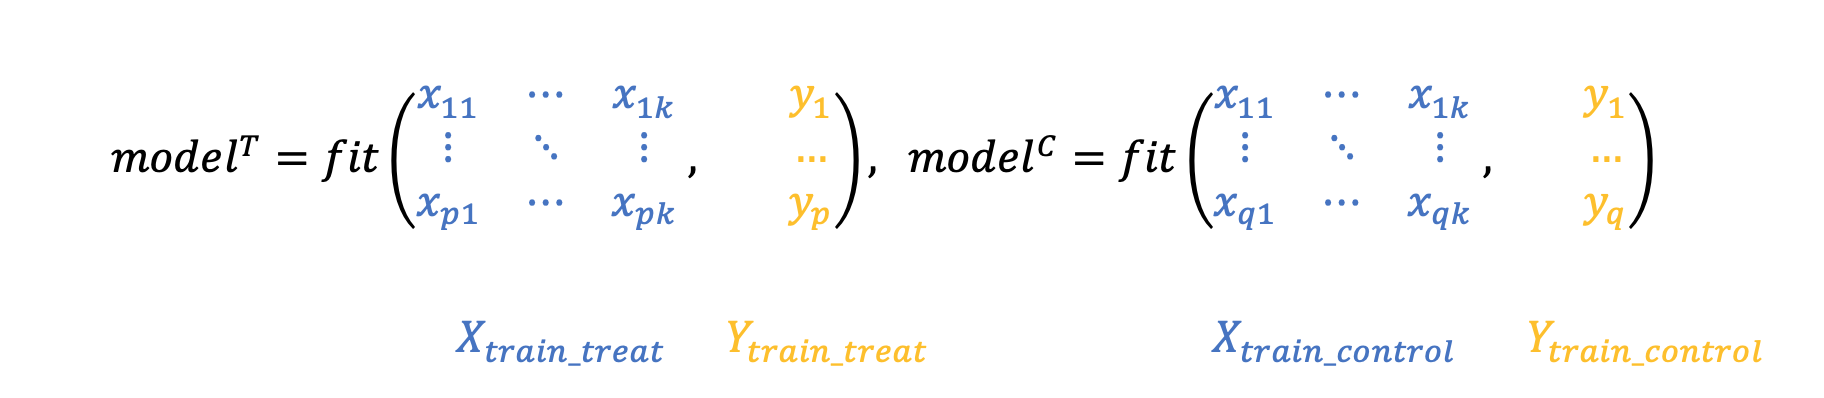

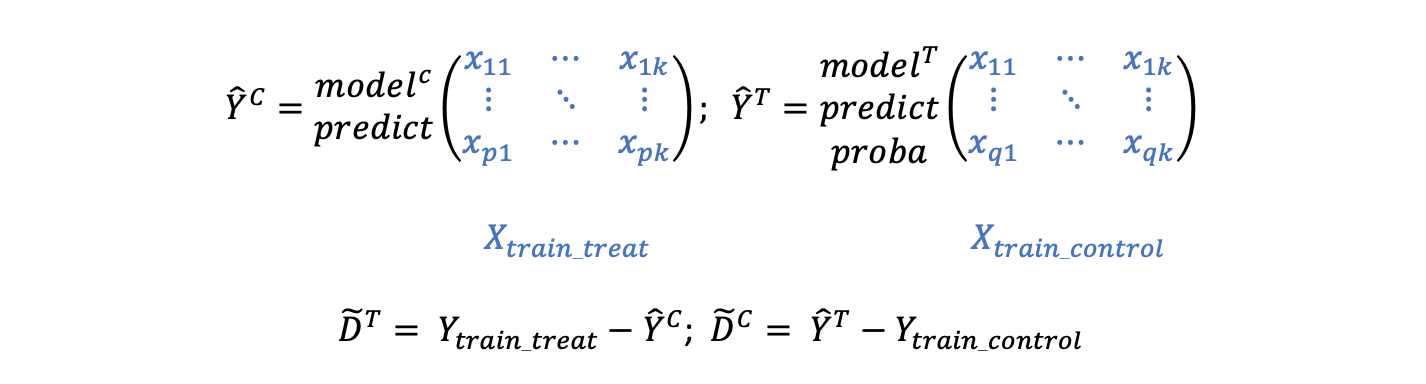

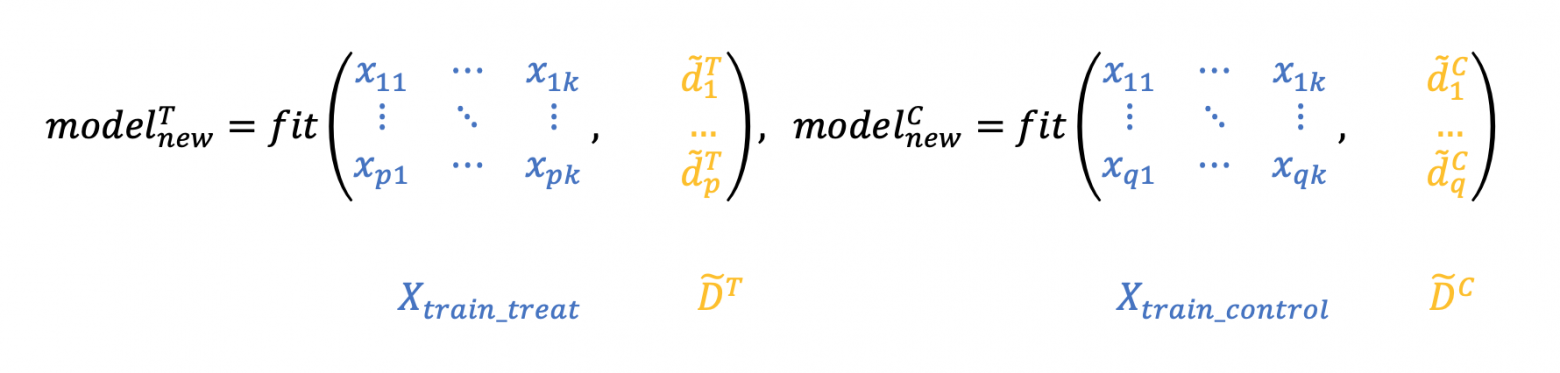

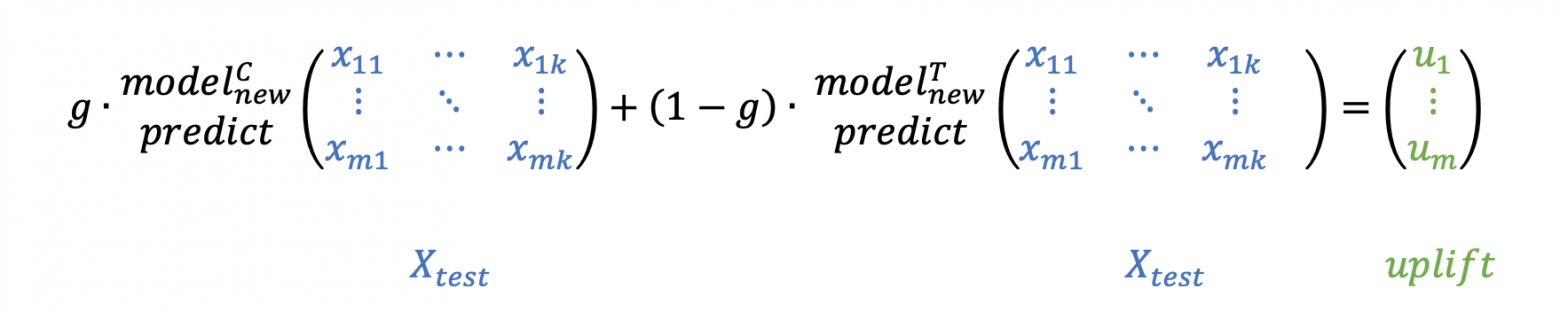

# Практическая часть

## Установка библиотеки LightAutoML + необходимых библиотек

Установка может занимать несколько минут:

In [ ]:
# Установка библиотеки LightAutoML
!pip install lightautoml==0.3.8b1
!pip install transformers
# Библиотека для загрузки данных из Google-диска
! pip install gdown

## Загрузка данных

In [ ]:
import gdown

url = "http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv"
output = "hillstrom.csv"
gdown.download(url, output, quiet=False)

## Описание данных и задачи

**Датасет "Kevin Hillstrom"**

Этот набор данных содержит информацию об 64 000 клиентов, которые в последний раз совершали покупки в течение двенадцати месяцев и на которых проводились рассылки по электронной почте. Клиенты были разделены случайным образом на три группы (компании):

* 1/3 - предложения с мужскими товарами.
* 1/3 - предложения c женскими товарами.
* 1/3 - не получили предложения.


Результаты рассылки по электронной почте наблюдались в течение двух недель.


Признаки:
* Recency: Количество месяцев с момента последней покупки.
* History_Segment: Сегмент пользователей, сформированный на основе трат в прошлом году.
* History: Фактическая стоимость в долларах, потраченная в прошлом году.
* Mens: Индикатор того, что клиент приобрел мужские товары в прошлом году.
* Womens: Индикатор того, что клиент приобрел женские товары в прошлом году.
* Zip_Code: Категория почтового индекса - Городской, Пригородный или Сельский.
* Newbie: Индикатор того, что клиент новый за последние двенадцать месяцев.
* Channel: Каналы, через которые клиент приобрел в прошлом году.

Дополнительные колонки:

* visit: Индикатор того, что клиент зашел на сайт в течение 2-х недель после рассылки
* segment: Сегмент, в котором оказался клиент


**Задача**

Выделение клиентов, для которых рассылка оказала большее влияние по сравнению с остальными.

## EDA

Импортируем pandas для работы с табличными данными.

In [ ]:
import pandas as pd

pd.options.mode.chained_assignment = None

Загружаем скачанный датасет.

In [ ]:
uplift_df = pd.read_csv("hillstrom.csv")
del uplift_df['conversion'], uplift_df['spend']

Верхние 5 строк датасета выглядят так:

In [ ]:
uplift_df.head()



*   `visit` - это наша целевая переменная (target). Она показывает, что клиент совершил целевое действие - зашёл на сайт после рассылки.
*   `segment` - это наш treatment. Показывает, к какой группе относится пользователь - была с ним коммуникация или нет.



In [ ]:
TARGET_NAME = "visit"
TREATMENT_NAME = "segment"

Изучим, что представляет собой целевая переменная. Видим, что примерно 14,6% пользователей зашли на сайт вне зависимости от того, была ли с ними коммуникация:

In [ ]:
uplift_df[TARGET_NAME].describe()

count    64000.000000
mean         0.146781
std          0.353890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: visit, dtype: float64

Посмотрим, какая доля пользователей из каждого сегмента зашла на сайт. Ожидаемо, меньше всего заходили на сайт те, которым письмо не отправляли.

In [ ]:
agg_funcs = ["count", "sum", "mean"]
uplift_df.groupby(TREATMENT_NAME)[TARGET_NAME].agg(agg_funcs)

,count,sum,mean
segment,,,
Mens E-Mail,21307,3894,0.182757
No E-Mail,21306,2262,0.106167
Womens E-Mail,21387,3238,0.151400


Перейдём к бинарной задаче Uplift. Выделим из обучающей выборки только пользователей, которым либо отправили предложение с женскими товарами, либо не отправляли письмо вовсе.

In [ ]:
SEGMENTS_MAPPING = {
    "Womens E-Mail": 1,
    "No E-Mail": 0
}

women_email_uplift_df = uplift_df[uplift_df[TREATMENT_NAME].isin(SEGMENTS_MAPPING)]
women_email_uplift_df[TREATMENT_NAME] = women_email_uplift_df[TREATMENT_NAME].map(SEGMENTS_MAPPING)

## Разделение выборки на две части (train/test)

In [ ]:
from sklearn.model_selection import train_test_split

Для корректного построения модели нам нужно разделить выборки на обучающую и тестовую. Причём, очень важно, чтобы это разделение было стратифицированным! То есть, сохраняло пропорции пользователей по сегментам и по таргету. Для этого мы задаём параметр stratify в функции разбиения. В качестве тестовой части оставляем 30% от выборки.

In [ ]:
stratify_values = women_email_uplift_df[[TREATMENT_NAME, TARGET_NAME]]
train_df, test_df = train_test_split(
    women_email_uplift_df,
    stratify=stratify_values,
    test_size=0.3,
    shuffle=True,
    random_state=10
)

Итак, обучащая выборка содержит 29885 объектов, а тестовая - 12808.

In [ ]:
train_df.shape, test_df.shape

Убедимся, что в обучающей и тестовой выборках распределение таргета по сегментам совпадает.

In [ ]:
train_df.groupby(TREATMENT_NAME)[TARGET_NAME].agg(agg_funcs)

In [ ]:
test_df.groupby(TREATMENT_NAME)[TARGET_NAME].agg(agg_funcs)

Представим `test_target` и `test_treatment` в виде одномерных векторов для удобства подсчёта метрик.

In [ ]:
test_target, test_treatment = (
    test_df[TARGET_NAME].values.ravel(),
    test_df[TREATMENT_NAME].values.ravel(),
)

## Обучение модели AutoUplift

Загружаем необходимые классы lightautoml.

In [ ]:
from lightautoml.addons.uplift.base import AutoUplift
from lightautoml.tasks import Task

Задаём роли переменных, указывающие модели, что в обучающей выборке считать таргетом, а что - тритментом.

In [ ]:
roles = {
    "target": TARGET_NAME,
    "treatment": TREATMENT_NAME,
}

Указываем модели, что решается бинарная задача:

In [ ]:
task = Task('binary')

Инициализируем класс AutoUplift, и передаём туда необходимые параметры:

*   `task` - тип задачи
*   `metric` - либо название одной из встроенных метрик, либо своя функция метрики
*   `has_report` - готовить отчёт о построении модели или нет
*   `test_size` - размер валидационной выборки, которую AutoUplift использует внутри себя
*   `timeout` - лимит времени в секундах




In [ ]:
autouplift = AutoUplift(
    task,
    metric="adj_qini",
    has_report=True,
    test_size=0.2,
    timeout=120
)

Запускаем обучение модели с помощью метода fit. Передаём ему на вход:


*   `train_df` - обучающая выборка
*   `roles` - роли переменных, см. выше
*   `verbose` - параметр, указывающий, насколько подробно отображается процесс обучения



In [ ]:
%%time

autouplift.fit(train_df, roles, verbose=0)

В процессе обучения AutoUplift перебирает разные металёрнеры. Теперь мы можем их сравнить по метрике и вывести самые успешные при помощи встроенной функции `get_metalearners_rating()`:

In [ ]:
rating_df = autouplift.get_metalearners_rating()

Лучшим оказался XLearner с дефолтными параметрами:

In [ ]:
rating_df

Теперь построим лучший металёрнер, уже на всей обучающей выборке `train_df`, и сделаем предсказание на тестовой выборке `test_df`:

In [ ]:
%%time

best_metalearner = autouplift.create_best_metalearner(
    need_report=True
)
best_metalearner.fit(train_df, roles)

Сделаем предсказание на тестовой выборке `test_df`:

In [ ]:
uplift_pred, _, _ = best_metalearner.predict(test_df);

Отчет полученной модели сохраняет в папку ```lama_report/```.

### Скачиваем результаты отчёта

In [ ]:
! zip -r lama_report.zip lama_report/

In [ ]:
import os
from google.colab import files

files.download('lama_report.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Внутри архива lama_report.zip будет находится отчёт (файл 'lama_interactive_report.html').


В нем можно посмотреть подробную информацию по обучению, а также метрики на тестовой выборке.

## Uplift At TOP-K

Теперь построим график зависимости средней величины аплифта от доли K тестовой выборки, отсортированной по убыванию значения аплифта. Будем использовать следующие значения K:

In [ ]:
import numpy as np

tops = np.arange(10, 101, 10)
print(tops)

Для каждого значения K вычисляем среднюю величину аплифта:

In [ ]:
from lightautoml.addons.uplift.metrics import calculate_uplift_at_top

uplift_at_tops = []
for top in tops:
    uat = calculate_uplift_at_top(test_target, uplift_pred, test_treatment, top=top)
    uplift_at_tops.append(uat)

Построим график:

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(tops, uplift_at_tops, marker='.')

ax.legend(['Uplift_At_K'])
ax.set_xticks(np.arange(0, 101, 10))

#ax.grid(b=True)
plt.show()

# Практическая часть, дополнительные задания

Практические задачи предлагается провести на данных, полученных на другой маркетинговой компании "рассылка с мужскими товарами".

## Задание №1

Подготовьте датасет как было показано выше, но используя для этого уже данные рассылок с мужскими товарами. Разбейте его на тестовую и контрольную группу (30%).

### Код

In [ ]:
# Исправьте код таким образом, чтобы выделить сегмент пользователей, которым рассылались мужские товары.

# # Выбор сегмента

SEGMENTS_MAPPING = {
    # TODO
    "No E-Mail": # TODO
}

men_email_uplift_df = uplift_df[uplift_df[TREATMENT_NAME].isin(SEGMENTS_MAPPING)]
men_email_uplift_df[TREATMENT_NAME] = men_email_uplift_df[TREATMENT_NAME].map(SEGMENTS_MAPPING)

# # Обучающая и тестовая выборка

stratify_values = men_email_uplift_df[[TREATMENT_NAME, TARGET_NAME]]

men_train_df, men_test_df = train_test_split(
    men_email_uplift_df,
    stratify=stratify_values,
    test_size=0.3,
    shuffle=True,
    random_state=10
)

### Ответ

In [ ]:
# # Выбор сегмента

# SEGMENTS_MAPPING = {
#     "Mens E-Mail": 1,
#     "No E-Mail": 0
# }

# men_email_uplift_df = uplift_df[uplift_df[TREATMENT_NAME].isin(SEGMENTS_MAPPING)]
# men_email_uplift_df[TREATMENT_NAME] = men_email_uplift_df[TREATMENT_NAME].map(SEGMENTS_MAPPING)

# # Обучающая и тестовая выборка

# stratify_values = men_email_uplift_df[[TREATMENT_NAME, TARGET_NAME]]

# men_train_df, men_test_df = train_test_split(
#     men_email_uplift_df,
#     stratify=stratify_values,
#     test_size=0.3,
#     shuffle=True,
#     random_state=10
# )

## Задание №2

Напишите функцию, которая будет расчитывать величину аплифт на ТОП-10

В LightAutoML есть набор готовых метрик (которые можно передать по названию в AutoUplift):

In [ ]:
from lightautoml.addons.uplift.metrics import _available_uplift_modes

In [ ]:
print(_available_uplift_modes)

 В AutoUplift-е есть возможность указания своей метрики для выбора лучшего алгоритма(металернера). Функция, вычисляющая значение желаемой метрики, передаётся как аргумент ```metric``` при создание объекта класса ```AutoUplift```. Для того, чтобы функцию можно было использовать в качестве метрики в качестве метрики, необходимо чтобы функция(метрика) имела три параметра:


1.   массив значений с целевой величиной
2.   массив значений с предсказаниями аплифт модели
3.   массив значений с флагом целевой/контрольной группы


В LightAutoML имеется функция ```calculate_uplift_at_top```, считающая величину аплифт на ТОП-е.

  Пример использования:
```python
from lightautoml.addons.uplift.metrics import calculate_uplift_at_top

uplift_at_42 = calculate_uplift_at_top(target, uplift_pred, treatment, 42)
```

Напишите функцию на основе данной функцию, которая будет расчитывать аплифт на ТОП-10 , чтобы ее можно было использовать в AutoUplift.

### Код

In [ ]:
# Дополните код, чтобы получилась рабочая функция

In [ ]:
from lightautoml.addons.uplift.metrics import calculate_uplift_at_top

def uplift_at_10(target, uplift, treatment):
    uplift = calculate_uplift_at_top(y_true = #
                                     ,uplift_pred = #
                                     ,treatment = #
                                     ,top = #
                                     )
    return uplift

### Ответ

In [ ]:
# from lightautoml.addons.uplift.metrics import calculate_uplift_at_top

# def uplift_at_10(target, uplift, treatment):
#     uplift = calculate_uplift_at_top(target, uplift, treatment, 10)
#     return uplift

## Задание №3

Запустите расчет AutoUplift на данных и метрике, сформированных в заданиях №1 и №2 (при обучении используйте параметры ```timeout=120```).
Какой металернер оказался лучшим? Какое значение метрики у него вышло?

### Код

In [ ]:
# Напишите свое решение тут

In [ ]:
roles = {
    "target": TARGET_NAME,
    "treatment": TREATMENT_NAME,
}

task = Task('binary')

autouplift = AutoUplift(
    task,
    metric=, # TODO
    has_report=True,
    test_size=0.2,
    timeout=120
)

autouplift.fit(data= # TODO
               , roles=roles
               , verbose=0)
rating_df = autouplift.get_metalearners_rating()
rating_df

### Ответ

In [ ]:
# roles = {
#     "target": TARGET_NAME,
#     "treatment": TREATMENT_NAME,
# }

# task = Task('binary')

# autouplift = AutoUplift(
#     task,
#     metric=uplift_at_10,
#     has_report=True,
#     test_size=0.2,
#     timeout=120
# )

# autouplift.fit(men_train_df, roles, verbose=0)
# rating_df = autouplift.get_metalearners_rating()
# rating_df

Значение метрики: ~0.14

## Задание №4

На отложенной контрольной выборке выделите сегмент клиентов (1000 человек), с которыми эффективнее всего можно прокоммуницировать. Какое фактическое значение аплифта (относительное значение) на данном сегменте получилось? Сравните его со значением аплифта на всей тестовой выборке.

#### Код

In [ ]:
# Напишите свое решение тут

In [ ]:
uplift_pred, _, _ = autouplift.predict(men_test_df)
uplift_pred = uplift_pred.ravel()

men_test_df['uplift_pred'] = uplift_pred
men_test_df.sort_values('uplift_pred', inplace=True, ascending=False)

NUM_ROWS = 1000
best_segment_df = # TODO

mean_target_per_group_at_top = # TODO
uplift_at_top = # TODO

mean_target_test = men_test_df.groupby(TREATMENT_NAME)[TARGET_NAME].mean()
uplift_at_test = mean_target_test[1] - mean_target_test[0]

print("Uplift(TOP-1000) = {:.3f}".format(uplift_at_top))
print("Uplift(TOP-100%) = {:.3f}".format(uplift_at_test))

###  Ответ

In [ ]:
# uplift_pred, _, _ = autouplift.predict(men_test_df)
# uplift_pred = uplift_pred.ravel()

# men_test_df['uplift_pred'] = uplift_pred
# men_test_df.sort_values('uplift_pred', inplace=True, ascending=False)

# NUM_ROWS = 1000
# best_segment_df = men_test_df.iloc[:NUM_ROWS][[TREATMENT_NAME, TARGET_NAME]]

# mean_target_per_group_at_top = best_segment_df.groupby(TREATMENT_NAME)[TARGET_NAME].mean()
# uplift_at_top = mean_target_per_group_at_top[1] - mean_target_per_group_at_top[0]

# mean_target_test = men_test_df.groupby(TREATMENT_NAME)[TARGET_NAME].mean()
# uplift_at_test = mean_target_test[1] - mean_target_test[0]

# print("Uplift(TOP-1000) = {:.3f}".format(uplift_at_top))
# print("Uplift(TOP-100%) = {:.3f}".format(uplift_at_test))

Uplift(TOP-1000) = 0.134
Uplift(TOP-100%) = 0.077


Uplift(TOP-1000) ~= 0.12

Uplift(TOP-100%)  = 0.08

# MultiLabel моделирование

В этой части семинара для задачи с несколькими таргетами мы сравним два подхода к построению модели:

*   одна модель multilabel
*   несколько моделей, по одной на каждый таргет



In [ ]:
import numpy as np

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from sklearn.metrics import log_loss

Загрузка данных для мультилейбл задачи:

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1YGm7Ifbe3HNZ5qoN2YfKfFHtUvnL1Q2t" -O "mobilemoney.csv"

### Датасет Mobile Money

Датасет содержит демографические данные примерно о 7000 людях, а также информацию, какими финансовыми сервисами они пользуются.

In [ ]:
data_multilabel = pd.read_csv("mobilemoney.csv")

Данные выглядят таким образом:

In [ ]:
data_multilabel.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [ ]:
data_multilabel.shape

(7094, 37)

Столбцы с целевыми переменными:


*   `mobile_money` - пользуется ли человек мобильными платежами
*   `savings` - есть ли у человека сбережения
*   `borrowing` - занимает ли человек деньги
*   `insurance` - есть ли у человека страховка



In [ ]:
TARGETS = ['mobile_money', 'savings', 'borrowing', 'insurance']

Разбиваем датасет на обучающую и тестовую выборку. Поскольку столбец `mobele_money_classification` содержит информацию, пересекающуюся с четырьмя целевыми столбцами, мы его удаляем из обучения и теста.

In [ ]:
train_multilabel, test_multilabel = train_test_split(data_multilabel,
                                                     test_size=0.3,
                                                     random_state=0,
                                                     stratify=data_multilabel['mobile_money_classification'])

del train_multilabel['mobile_money_classification'], test_multilabel['mobile_money_classification']

### Первый подход: единственная модель multilabel

Задаём таск для нашей задачи:

In [ ]:
task = Task('multilabel')

INFO2:lightautoml.tasks.losses.cb:CatBoost uses as obj. MultiCrossEntropy.


multilabel isn`t supported in lgb


Задаём роли переменных:

In [ ]:
roles = {'target': TARGETS, 'drop': ['ID'] }

 Создаём класс AutoML из табличного пресета. Аргументы:

*   `task` - multilabel
*   `timeout` - условно "бесконечный"
*   `general_params` - задаём список используемых алгоритмов: denselight и catboost
*   `nn_params` - параметры обучения нейронной сети denselight
*   `nn_pipeline_params` - параметры препроцессинга данных для нейронной сети






In [ ]:
automl = TabularAutoML(
    task = task,
    timeout = 9999999999,
    general_params = {'use_algos': [['denselight', 'cb']]},
    nn_params={
            "n_epochs": 15, "bs": 2048, "num_workers": 0, "path_to_save": None,
        },
    nn_pipeline_params = {"use_qnt": False, "use_te": False},
)

Обучаем модель и получаем out-of-fold предсказания на обучающей выборке:

In [ ]:
%%time

oof = automl.fit_predict(train_multilabel, roles = roles, verbose = 1).data

Получаем предсказание на тестовых данных:

In [ ]:
%%time

pred = automl.predict(test_multilabel).data

CPU times: user 2.8 s, sys: 21.7 ms, total: 2.82 s
Wall time: 2.42 s


Считаем метрику log_loss на out-ot-fold предсказании и на тесте:

In [ ]:
log_loss(train_multilabel[TARGETS], oof), log_loss(test_multilabel[TARGETS], pred)

### Задание: индивидуальные модели

Предлагаем решить поставленную задачу, обучая отдельную модель для каждого класса.

Для каждого таргета создаём отдельный класс TabularAutoML с бинарной задачей классификации. Обучаем модели и делаем предсказание каждой моделью на out-of-fold и на тестовой выборке. Затем объединяяем результат.

#### Код

In [ ]:
%%time

oof_individual = []
pred_individual = []

for i in TARGETS:

    # Ваш код здесь
    # При обучении на конкретной целевой переменной не забудьте выкинуть
    # остальные таргеты, так как они не доступны на этапе предсказания

    oof_i = # TODO
    pred_i = # TODO
    oof_individual.append(oof_i)
    pred_individual.append(pred_i)

oof_individual = np.hstack(oof_individual)
pred_individual = np.hstack(pred_individual)

Сравниваем метрику с первым подходом.

In [ ]:
log_loss(train_multilabel[TARGETS], oof_individual), log_loss(test_multilabel[TARGETS], pred_individual)

#### Ответ

In [ ]:
# %%time

# oof_individual = []
# pred_individual = []

# for i in TARGETS:
#     for_drop = list(set(TARGETS) - {i})

#     task = Task('binary', metric='logloss')
#     roles = {'target': i, 'drop': ['ID'] +  for_drop}

#     automl = TabularAutoML(
#         task = task,
#         timeout = 9999999999,
#         general_params = {'use_algos': [['denselight', 'cb']]},
#         nn_params={
#                 "n_epochs": 15, "bs": 2048, "num_workers": 0, "path_to_save": None,
#             },
#         nn_pipeline_params = {"use_qnt": False, "use_te": False},
#     )
#     oof_i = automl.fit_predict(train_multilabel, roles = roles, verbose = 1).data
#     pred_i = automl.predict(test_multilabel).data

#     oof_individual.append(oof_i)
#     pred_individual.append(pred_i)

# oof_individual = np.hstack(oof_individual)
# pred_individual = np.hstack(pred_individual)